In [76]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

### Data Cleaning

In [1218]:
columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'NScore', 'Escore', 'Oscore', 'Ascore', 
          'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 
           'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Methadone', 'Mushrooms', 
           'Nicotine', 'Semer', 'VSA']

In [829]:
df = pd.read_csv('drug_consumption.csv', names=columns)

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,NScore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Methadone,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
df.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
NScore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Methadone     object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [830]:
#Data Cleaning

df['Gender'] = df['Gender'].apply(lambda x: 0 if x < 0 else 1)

In [831]:
ethnicity_dict = {-.50212:'Asian', -1.10702:'Black', 1.90725:'Black/Asian', .12600:'White/Asian', -.22166:'White/Black', 
                .11440:'Other', -.31685:'White'}

country_dict = {-0.09765:'Australia', 0.24923:'Canada', -0.46841:'New Zealand', -0.28519:'Other', 0.21128:'Ireland', 
               0.96082:'UK', -0.57009:'USA'}

In [832]:
df['Ethnicity'] = df['Ethnicity'].apply(lambda x: ethnicity_dict[x])

In [833]:
df['Country'] = df['Country'].apply(lambda x: country_dict[x])

In [834]:
usage_dict = {'CL0': 0, 'CL1': 0, 'CL2': 1, 
              'CL3': 1, 'CL4': 1, 'CL5': 1, 
              'CL6': 1}

In [835]:
drugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", 
         "Ketamine", "Legalh", "LSD", "Methadone", "Mushrooms", "Nicotine", "Semer", "VSA"]

for drug in drugs:
    df[drug] = df[drug].apply(lambda x: usage_dict[x])

In [861]:
df["Mushrooms"].value_counts()

0    1191
1     694
Name: Mushrooms, dtype: int64

### Setting up Classification Problem

In [1599]:
#define classification problems: semeron consumption, heroin consumption

X = df[['Age', 'Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_Australia', 'Country_Canada',
       'Country_Ireland', 'Country_New Zealand', 'Country_Other', 'Country_UK',
       'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Black/Asian', 'Ethnicity_Other', 
        'Ethnicity_White', 'Ethnicity_White/Asian', 'Ethnicity_White/Black']]

y = df['Mushrooms']

In [837]:
df = pd.get_dummies(df, columns=['Country', 'Ethnicity'])

In [207]:
df['Heroin']

0       0
1       0
2       0
3       0
4       0
       ..
1880    0
1881    0
1882    0
1883    0
1884    0
Name: Heroin, Length: 1885, dtype: int64

In [342]:
df['Heroin'] = df['Heroin'].apply(lambda x: usage_dict[x])

### Decision Tree

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

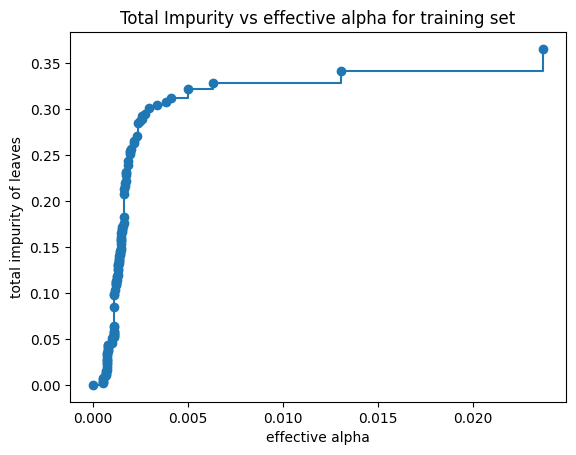

In [1600]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [1601]:
#create list of effective alphas for pruning 

alphas = ccp_alphas[:-1]

In [1602]:
# create list of decision tree classifiers with different alpha values to plot
clfs = []

for alpha in alphas: 
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha = alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [1603]:
train_scores = [roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]) for clf in clfs]
test_scores = [metrics.roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1]) for clf in clfs]
'''
plt.clf()
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("ROC-AUC")
ax.set_title("ROC-AUC vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()

plt.savefig("coke_roc_auc_alpha.png")
'''

'\nplt.clf()\nfig, ax = plt.subplots()\nax.set_xlabel("alpha")\nax.set_ylabel("ROC-AUC")\nax.set_title("ROC-AUC vs alpha for training and testing sets")\nax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")\nax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")\nax.legend()\n\nplt.savefig("coke_roc_auc_alpha.png")\n'

In [1224]:
best_score_index = np.argmax(np.array(test_scores))
alpha = alphas[best_score_index]
print(alpha)
print(test_scores)

0.002590779007060246
[0.6523509561304837, 0.6429021372328458, 0.6400224971878515, 0.6379977502812149, 0.6372553430821146, 0.6317885264341957, 0.6308661417322834, 0.633408323959505, 0.633408323959505, 0.633408323959505, 0.6323284589426321, 0.6323284589426321, 0.6357705286839145, 0.6523059617547806, 0.6535208098987626, 0.6535208098987626, 0.656962879640045, 0.6557255343082115, 0.6504161979752532, 0.657615298087739, 0.657615298087739, 0.6563554555680541, 0.6534308211473565, 0.653970753655793, 0.6539932508436446, 0.6250393700787402, 0.6250393700787402, 0.6233070866141732, 0.6242969628796401, 0.6474240719910012, 0.6474240719910012, 0.6474240719910012, 0.6474240719910012, 0.6474240719910012, 0.6474240719910012, 0.6474240719910012, 0.6474240719910012, 0.6474240719910012, 0.6349606299212598, 0.6488638920134984, 0.6514285714285715, 0.6514285714285715, 0.6499887514060743, 0.6596400449943758, 0.6596400449943758, 0.6596400449943758, 0.6596400449943758, 0.6596400449943758, 0.6597975253093363, 0.659

In [1198]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
clf.fit(X_train, y_train)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

print(clf.tree_.node_count)


9


/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/utils/_response.py", line 73, in _get_response_values
    prediction_method = _check_response_method(estimator, respo

Text(0.5, 1.0, 'Learning Curve, Mushrooms')

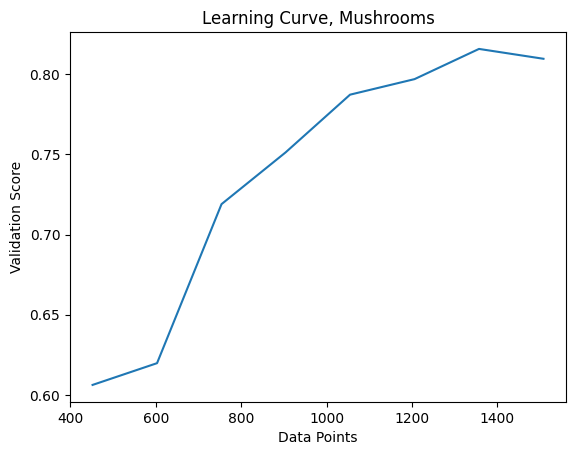

In [1606]:
train_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=.0026)
#clf.fit(X_train, y_train)
#roc_auc_score(y_test, clf.predict(X_test))

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, train_sizes=train_sizes, scoring='roc_auc')

plt.plot(train_sizes, test_scores.mean(axis=1))
plt.xlabel("Data Points")
plt.ylabel("Validation Score")
plt.title("Learning Curve, Mushrooms")

#plt.savefig("decision_tree_learn_curve_coke.png")

Max Depth: 1, ROC-AUC: 0.6704611923509562
Max Depth: 2, ROC-AUC: 0.6737682789651294
Max Depth: 3, ROC-AUC: 0.6785826771653544
Max Depth: 4, ROC-AUC: 0.6737682789651294
Max Depth: 5, ROC-AUC: 0.6282339707536557
Max Depth: 6, ROC-AUC: 0.6458492688413948
Max Depth: 8, ROC-AUC: 0.6127784026996625
Max Depth: 10, ROC-AUC: 0.5476040494938132


Text(0.5, 1.0, 'Decision Tree Max Depth vs Validation ROC-AUC, Coke')

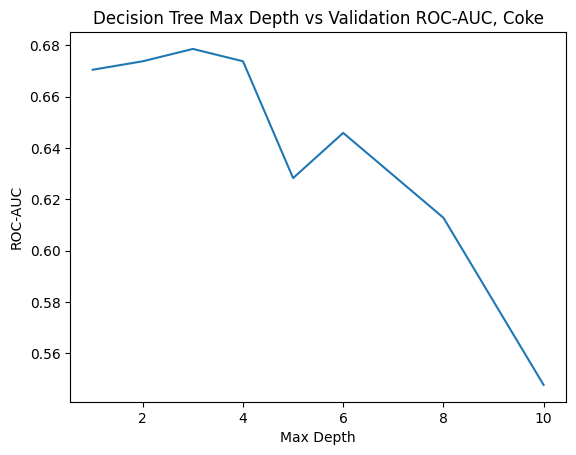

In [1200]:
# get pruning graphs and learning curves for both cocaine and mushroom problems. 
# get graphs for max_depth too
max_depths = [1, 2, 3, 4, 5, 6, 8, 10]
scores = []

for depth in max_depths:
    clf = DecisionTreeClassifier(random_state=0, max_depth = depth)
    clf.fit(X_train, y_train)
    roc_auc = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])
    print(f"Max Depth: {depth}, ROC-AUC: {roc_auc}")
    scores.append(roc_auc)

plt.plot(max_depths, scores)
plt.xlabel("Max Depth")
plt.ylabel("ROC-AUC")
plt.title("Decision Tree Max Depth vs Validation ROC-AUC, Coke")
#plt.savefig("decision_tree_max_depth_coke.png")

/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/utils/_response.py", line 73, in _get_response_values
    prediction_method = _check_response_method(estimator, respo

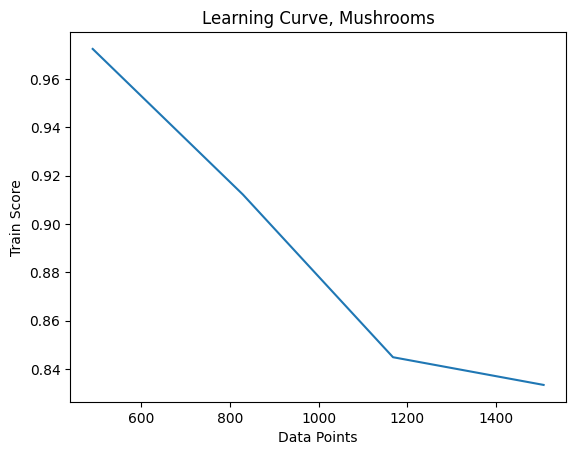

In [1607]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=.0026)

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, scoring='roc_auc')
plt.plot(train_sizes, train_scores.mean(axis=1))
plt.xlabel("Data Points")
plt.ylabel("Train Score")
plt.title("Learning Curve, Mushrooms")

plt.savefig("decision_tree_train_curve_mushrooms.png")

In [1217]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 3)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
runtime = end - start
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(roc_auc)
print(f"Runtime: {runtime}")
print(clf.tree_.node_count)

0.800845016324179
Runtime: 0.007638692855834961
15


In [1240]:
# early stopping experiment
scores=[]

train_sizes = [200, 400]

max_depths = [1, 2, 3, 4, 5, 6, 8, 10]


for size in train_sizes:
    
    best_score = 0
    
    for depth in max_depths:
        
        clf = DecisionTreeClassifier(random_state=0, max_depth = depth)

        clf.fit(X_train[:size], y_train[:size])
        valid_score = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])
        if valid_score > best_score:
            best_score = valid_score
            best_depth = depth
            
    
    clf = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
    clf.fit(X_train[:size], y_train[:size])

    
    scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


print(scores)

[0.7589782984444018, 0.7999807950835414]


In [1238]:
alphas = np.arange(0, .0035, .0005)

scores=[]

train_sizes = [200, 400]


for size in train_sizes:
    
    best_score = 0
    
    for alpha in alphas:
        
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha = alpha)

        clf.fit(X_train[:size], y_train[:size])
        valid_score = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])
        if valid_score > best_score:
            best_score = valid_score
            best_alpha = alpha
    
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
    clf.fit(X_train[:size], y_train[:size])

    
    scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))


print(scores)

[0.6925452915946482, 0.6602810319441776]


### Neural Network

In [155]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader

In [1361]:
#define classification problems: semeron consumption, heroin consumption

X = df[['Age', 'Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_Australia', 'Country_Canada',
       'Country_Ireland', 'Country_New Zealand', 'Country_Other', 'Country_UK',
       'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Black/Asian', 'Ethnicity_Other', 
        'Ethnicity_White', 'Ethnicity_White/Asian', 'Ethnicity_White/Black']]

y = df['Mushrooms']

In [229]:
'''

Class rebalancing

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=.2, random_state=0)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
'''

In [157]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [1287]:
class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len


def load_data(X, y, batch_size):

    X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=.2, random_state=0)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0)


    train_data = Data(X_train, y_train)
    train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
    
    valid_data = Data(X_valid, y_valid)
    valid_dataloader = DataLoader(dataset=valid_data, batch_size=batch_size, shuffle=True)

    test_data = Data(X_test, y_test)
    test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)
    
    return train_dataloader, valid_dataloader, test_dataloader


In [1288]:
def initialize_network(width, learning_rate, decay):
    input_dim = 23
    hidden_dim_1 = width
    hidden_dim_2 = width
    output_dim = 1
        
    loss_fn = nn.BCELoss()

    class NeuralNetwork(nn.Module):
        def __init__(self, input_dim, hidden_dim, output_dim):
            super(NeuralNetwork, self).__init__()
            self.layer_1 = nn.Linear(input_dim, hidden_dim)
            nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
            self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
            nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")
            self.layer_3 = nn.Linear(hidden_dim, output_dim)

        
        

       
        def forward(self, x):
            x = torch.nn.functional.relu(self.layer_1(x))
            x = torch.nn.functional.relu(self.layer_2(x))


            x = torch.nn.functional.sigmoid(self.layer_3(x))

            return x

    model = NeuralNetwork(input_dim, hidden_dim_1, output_dim)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=decay)
    
    return model, optimizer
    
    

In [1340]:
from sklearn.metrics import roc_auc_score

def train_model(model, optimizer, num_epochs, X, y):
    
    # takes model optimizer and num_epochs as inputs, trains network
    # and saves the learning curves
    
    

    loss_values = []
    train_roc_aucs = []
    valid_roc_aucs = []


    best_auc = 0
    stop_counter = 0
    
    train_dataloader, valid_dataloader, test_dataloader = load_data(X, y, batch_size=32)

    for epoch in range(num_epochs):
    
        if stop_counter >= 10:
            break
    
        train_y_pred = []
        train_y = []
    
        for X, y in train_dataloader:
            # zero the parameter gradients
            optimizer.zero_grad()
       
            # forward + backward + optimize
            pred = model(X)
            loss = loss_fn(pred, y.unsqueeze(-1))
            loss_values.append(loss.item())
        
        
        
        
            loss.backward()
            optimizer.step()
            
            pred = pred.detach().numpy()
            train_y_pred += pred.tolist()
            train_y += y.detach().numpy().tolist()
        
    
        train_y_pred = np.array(train_y_pred)
        train_y = np.array(train_y)
    
        train_roc_auc = roc_auc_score(train_y, train_y_pred)
        train_roc_aucs.append(train_roc_auc)
        
    
        valid_y_pred = []
        valid_y = []
    
        with torch.no_grad():
    
            for X, y in valid_dataloader:
        
                pred = model(X).float()
                pred = list(itertools.chain(*pred))
                valid_y_pred += pred
                valid_y += list(y)
    
            valid_y_pred = np.array(valid_y_pred)
            valid_y = np.array(valid_y)
    
            valid_roc_auc = roc_auc_score(valid_y, valid_y_pred)
            valid_roc_aucs.append(valid_roc_auc)
        
            if valid_roc_auc > best_auc:
                torch.save(model.state_dict(), 'model_weights.pth')
                best_auc = valid_roc_auc
                stop_counter = 0
            else:
                stop_counter += 1
                
    print("Training complete")
    
    #load best-performing model 
    
    model.load_state_dict(torch.load('model_weights.pth'))
    
    
    step = np.linspace(0, len(valid_roc_aucs), len(valid_roc_aucs))
    
    # generate and save learning curves
    
    best_auc_index = np.argmax(np.array(valid_roc_aucs))
    
    best_auc = valid_roc_aucs[best_auc_index]

    fig, ax = plt.subplots(figsize=(8,5))
    plt.plot(step, np.array(valid_roc_aucs))
    plt.title("Step-wise Validation ROC-AUC")
    plt.xlabel("Epochs")
    plt.ylabel("ROC-AUC")
    plt.ylim((.65, .85))
    
    
    ax.annotate(f"Best ROC-AUC: {round(best_auc, 3)}", xy=(best_auc_index, best_auc), 
                xytext=(best_auc_index, best_auc - .03), arrowprops=dict(facecolor='black', shrink=0.05))
                
    
    #plt.savefig('validation_learning_curve.png')
    plt.clf()
    fig, ax = plt.subplots(figsize=(8,5))
    plt.plot(step, np.array(train_roc_aucs))
    plt.title("Step-wise Training ROC-AUC")
    plt.xlabel("Epochs")
    plt.ylabel("ROC-AUC")
    plt.ylim((.5, 1.0))
    #plt.savefig("train_learning_curve.png")
    plt.close()
    
    
    #get test performance
    
    with torch.no_grad():
        
        test_y_pred = []
        test_y = []
    
        for X, y in test_dataloader:
        
            pred = model(X).float()
            pred = list(itertools.chain(*pred))
            test_y_pred += pred
            test_y += list(y)
    
        test_y_pred = np.array(test_y_pred)
        test_y = np.array(test_y)
    
        test_roc_auc = roc_auc_score(test_y, test_y_pred)

    return train_roc_aucs, best_auc, test_roc_auc
    
            
            
    
    
        
# maybe get accuracy or roc-auc score at every step, on both training and test
# definitely roc-auc score

print("Training Complete")

Training Complete


In [ ]:
#next: run 



Training complete
torch.float32
Training complete
torch.float32
Training complete
torch.float32
Training complete
torch.float32


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

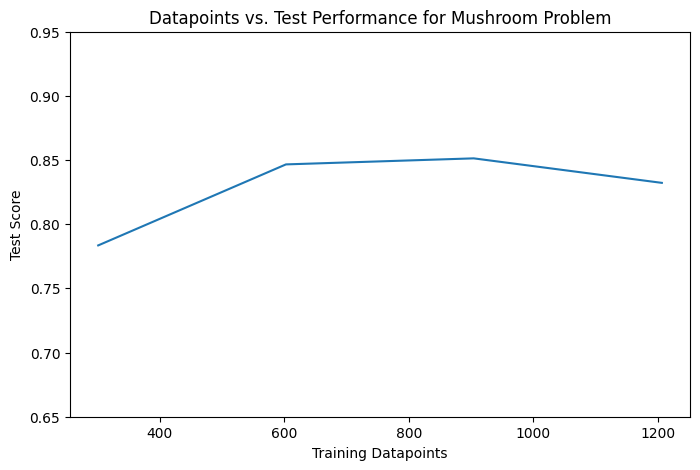

In [1362]:
model, optimizer = initialize_network(learning_rate = .1, width=128, decay=.001)


train_sizes = [.25, .5, .75, 1.0]

train_sizes = [int(size * len(X)) for size in train_sizes]

test_scores = []
train_scores = []

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=.2, random_state=0)

X_test = torch.from_numpy(X_test).float()

for size in train_sizes:
    model, optimizer = initialize_network(learning_rate = .1, width=128, decay=.001)
    train_roc_aucs, best_auc, _ = train_model(model, optimizer, 100, X[:size], y[:size])
    train_score = train_roc_aucs[-1]
    
    
    print(X_test.dtype)
    with torch.no_grad():
        y_pred = np.array(model(X_test))
    test_scores.append(roc_auc_score(y_test, y_pred))
    train_scores.append(train_score)



train_sizes = [size * .64 for size in train_sizes]
plt.plot(train_sizes, test_scores)
plt.xlabel("Training Datapoints")
plt.ylabel("Test Score")
plt.title("Datapoints vs. Test Performance for Mushroom Problem")
plt.ylim(.65, .95)
plt.savefig("nn_mushroom_datapoints_test.png")

# 150, 300, 500, 1000, 1500

In [1314]:
import os

def run_network_exp(hyper_params: dict, outfolder: str):
    """ run the experiments automatically and save all results """
    pwd = os.getcwd()
        
    best_score = 0
    best_params = ""
    
    summary = ""
    
    exp_data = []
    
    for learn_rate in hyper_params['learning_rate']:
        for layer_width in hyper_params['width']:
            for decay in hyper_params['weight_decay']:
                outdir = f"{pwd}/{outfolder}/nn_learning_rate_{learn_rate}_width_{layer_width}_decay_{decay}"
                cmd = f"mkdir -p {outdir}"
                os.system(cmd)
            
                model, optimizer = initialize_network(layer_width, learn_rate, decay)
                
                start = time.time()
                valid_score, test_score = train_model(model, optimizer, 100, X, y)
                end = time.time()
                
                runtime = end - start
                
                with open(outdir + "/runtime.txt", "w") as f:
                    f.write("(" + str(runtime) + " seconds)")
                
                            
                summary += f"Learning Rate: {learn_rate}, Width: {layer_width}, Decay: {decay}, Score: {valid_score}, Runtime: {runtime}\n"
                
                exp_data.append({"Learning Rate": learn_rate, "Width": layer_width, "Decay": decay, "Score": valid_score, "Runtime": runtime})
                
                if valid_score > best_score:
                    best_score = valid_score
                    best_params = f"Learning Rate: {learn_rate}, Width: {layer_width}, Decay: {decay}"  
                    best_network_test = test_score
                    
                cmd = f"mv *.png {outdir}"
                os.system(cmd)

    
    summary += f"\nBest validation score: {best_score}\n{best_params}\n Test performance: {best_network_test}"
    
    exp_dir = f"{pwd}/{outfolder}/mushroom_problem_data.txt"
    with open(exp_dir, "w") as f:
        f.write(summary)
        
    return exp_data

In [1338]:
params = {'width': [64, 128],
          'learning_rate': [.01, .05, .1, 1],
          'weight_decay': [1e-2, 1e-3, 1e-4]
         }

exp_data = run_network_exp(params, "fake_experiment")

# want a pandas dataframe with experiment data

Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete
Training complete


/var/folders/yz/d4wch5zd2m1dl4j2c078zfnm0000gn/T/ipykernel_9369/2601319878.py:109: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8,5))


Training complete


/var/folders/yz/d4wch5zd2m1dl4j2c078zfnm0000gn/T/ipykernel_9369/2601319878.py:95: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8,5))


Training complete
Training complete
Training complete


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [1325]:
exp_df = pd.DataFrame(exp_data)
exp_df.head()

,Learning Rate,Width,Decay,Score,Runtime
0,0.01,64,0.0100,0.722475,0.879020
1,0.01,64,0.0010,0.717075,0.377812
2,0.01,64,0.0001,0.698628,0.276074
3,0.01,128,0.0100,0.716040,0.535867
4,0.01,128,0.0010,0.713566,0.528891


In [1609]:
exp_df.groupby(["Learning Rate", "Width"])[['Score']].agg("mean")

Score
Learning Rate Width          
0.01          64     0.712726
              128    0.717900
0.05          64     0.720885
              128    0.723532
0.10          64     0.716243
              128    0.708346
1.00          64     0.560555
              128    0.526007

### Boosting

In [1460]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

param_grid = {'n_estimators': [10, 20, 50, 75, 100, 150, 200],
             'learning_rate': [.01, .05, .1, .5, 1]}

clf = GridSearchCV(ada, param_grid, cv=5, scoring='roc_auc', return_train_score=True)

X = df[['Age', 'Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_Australia', 'Country_Canada',
      'Country_Ireland', 'Country_New Zealand', 'Country_Other', 'Country_UK',
        'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Black/Asian', 'Ethnicity_Other', 
        'Ethnicity_White', 'Ethnicity_White/Asian', 'Ethnicity_White/Black']]

y = df['Mushrooms']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

clf.fit(X_train, y_train)

print(clf.best_params_)
print(clf.best_score_)
best_ada = clf.best_estimator_

#classification problems: Coke and Mushrooms
print(roc_auc_score(y_test, best_ada.predict_proba(X_test)[:, 1]))

{'learning_rate': 0.05, 'n_estimators': 150}
0.8369346955173059
0.8429357915626401


In [1447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0)


for est in param_grid['n_estimators']:
    for lr in param_grid['learning_rate']:
        ada = AdaBoostClassifier(n_estimators=est, learning_rate=lr)
        start = time.time()
        ada.fit(X_train, y_train)
        end = time.time()
        score = roc_auc_score(y_valid, ada.predict_proba(X_valid)[:, 1])
        runtime = end - start
        print(f"Estimators: {est}, Learning Rate: {lr}, Score: {score}, Runtime: {runtime}")


Estimators: 10, Learning Rate: 0.01, Score: 0.7188976377952756, Runtime: 0.014583826065063477
Estimators: 10, Learning Rate: 0.05, Score: 0.7221372328458942, Runtime: 0.008889198303222656
Estimators: 10, Learning Rate: 0.1, Score: 0.7279865016872891, Runtime: 0.008192062377929688
Estimators: 10, Learning Rate: 0.5, Score: 0.7294713160854892, Runtime: 0.0080718994140625
Estimators: 10, Learning Rate: 1, Score: 0.7249268841394826, Runtime: 0.008717775344848633
Estimators: 20, Learning Rate: 0.01, Score: 0.719572553430821, Runtime: 0.016012907028198242
Estimators: 20, Learning Rate: 0.05, Score: 0.7318110236220474, Runtime: 0.0157010555267334
Estimators: 20, Learning Rate: 0.1, Score: 0.7309561304836896, Runtime: 0.015756845474243164
Estimators: 20, Learning Rate: 0.5, Score: 0.7337007874015748, Runtime: 0.015555858612060547
Estimators: 20, Learning Rate: 1, Score: 0.7177502812148481, Runtime: 0.015553951263427734
Estimators: 50, Learning Rate: 0.01, Score: 0.7300112485939259, Runtime: 0.

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009034      0.000867         0.001605        0.000421   
1       0.015988      0.000157         0.001871        0.000031   
2       0.038157      0.000813         0.003124        0.000223   
3       0.055695      0.000139         0.003988        0.000024   
4       0.073814      0.000138         0.005039        0.000022   
5       0.110173      0.000252         0.007195        0.000066   
6       0.152070      0.010736         0.009636        0.000764   
7       0.008791      0.000410         0.001502        0.000123   
8       0.015555      0.000114         0.001714        0.000023   
9       0.037216      0.000156         0.002934        0.000012   

  param_learning_rate param_n_estimators  \
0                0.01                 10   
1                0.01                 20   
2                0.01                 50   
3                0.01                 75   
4                0.01                100  

/var/folders/yz/d4wch5zd2m1dl4j2c078zfnm0000gn/T/ipykernel_9369/2242498020.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(cv_results.groupby("param_n_estimators").agg("mean")["mean_test_score"])
/var/folders/yz/d4wch5zd2m1dl4j2c078zfnm0000gn/T/ipykernel_9369/2242498020.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(cv_results.groupby("param_n_estimators").agg("mean")["mean_train_score"])


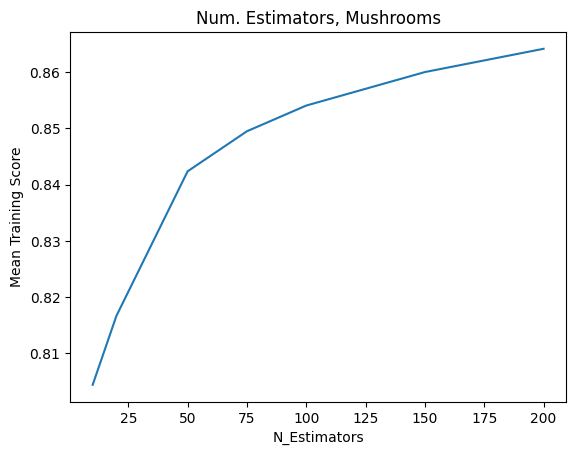

In [1462]:
cv_results = pd.DataFrame.from_dict(clf.cv_results_)
print(cv_results.head(10))

#gen learn_rate plot


plt.plot(cv_results.groupby("param_n_estimators").agg("mean")["mean_test_score"])

plt.ylabel("Mean Validation Score")
plt.xlabel("N_Estimators")
plt.title("Num. Estimators, Mushrooms")

plt.savefig("boost_estimators_test_curve_mushrooms.png")

plt.clf()
plt.plot(cv_results.groupby("param_n_estimators").agg("mean")["mean_train_score"])
plt.ylabel("Mean Training Score")
plt.xlabel("N_Estimators")
plt.title("Num. Estimators, Mushrooms")

plt.savefig("boost_estimators_train_curve_mushrooms.png")


#plt.plot(cv_results.groupby("param_learning_rate").agg("mean")["mean_test_score"])
#plt.scatter(estimators, scores)
#plt.show()


In [948]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)
y_pred = best_ada.predict(X_test)

np.unique(y_pred, return_counts=True)

(array([0, 1]), array([414, 209]))

/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 471, in _score
    return self._sign * self._sco

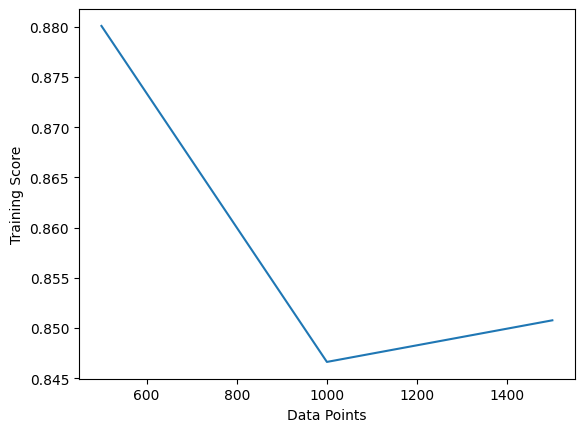

In [1463]:
import matplotlib as mpl
mpl.rcdefaults()

from sklearn.model_selection import learning_curve

train_sizes = 100, 200, 500, 1000, 1500

train_sizes, train_scores, test_scores = learning_curve(best_ada, X, y, train_sizes=train_sizes, scoring='roc_auc', random_state=0)

plt.plot(train_sizes, test_scores.mean(axis=1))
plt.xlabel("Data Points")
plt.ylabel("Validation Score")
plt.title("Learning Curve, Mushrooms")

plt.savefig("boost_learn_curve_mushrooms.png")

plt.clf()
plt.plot(train_sizes, train_scores.mean(axis=1))
plt.xlabel("Data Points")
plt.ylabel("Training Score")
plt.savefig("boost_train_curve_mushrooms.png")

### SVM

In [1402]:
#define classification problems: semeron consumption, heroin consumption

X = df[['Age', 'Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_Australia', 'Country_Canada',
       'Country_Ireland', 'Country_New Zealand', 'Country_Other', 'Country_UK',
       'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Black/Asian', 'Ethnicity_Other', 
        'Ethnicity_White', 'Ethnicity_White/Asian', 'Ethnicity_White/Black']]

y = df['Coke']

In [1083]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import time

param_grid = {'C': [.01, .1, 1, 10, 100], 
              'gamma': [1, .5, .1, .01, .001],
              'kernel': ['rbf', 'sigmoid']
             }

def run_svm_experiment(hyper_params, X, y, outfile, upsample=False):
    pwd = os.getcwd()
    
    content = ''
    
    best_score = 0
    best_combo = ''
    best_test = 0
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
    
    if upsample:
        sm = SMOTE(random_state = 2)

        X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
    
    
    for C in hyper_params['C']:
        for kernel in hyper_params['kernel']:
            
            if kernel == 'rbf':
                for gamma in hyper_params['gamma']:
                    svm = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
                    svm.fit(X_train, y_train)
                    
                    score = roc_auc_score(y_valid, svm.predict_proba(X_valid)[:, 1])
                    content += f"C: {C}, kernel: {kernel}, gamma: {gamma}, score: {score})\n"
                    
                    test_score = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
                    
                    if score > best_score:
                        best_score = score
                        best_combo = f"C: {C}, kernel: {kernel}, gamma: {gamma}"
                        best_test = test_score
            else:
                svm = SVC(kernel=kernel, C=C, probability=True)
                
                svm.fit(X_train, y_train)
              
                
                score = roc_auc_score(y_valid, svm.predict_proba(X_valid)[:, 1])
                content += f"C: {C}, kernel: {kernel}, score: {score}\n"
                
                test_score = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
                    
                if score > best_score:
                    best_score = score
                    best_combo = f"C: {C}, kernel: {kernel}"
                    best_test = test_score
                    
    
    content += f"\nBest score: {best_score}"
    content += f"\nBest hyperparameter combination is " + best_combo
    content += f"\nTest score: {best_test}"
    
    
                    
                    

    outdir = f"{pwd}/svm_experiments"
    cmd = f"mkdir -p {outdir}"
    os.system(cmd)
    
        
    with open(outdir + "/" + outfile, "w") as f:
        f.write(content)
        
    return
    
    


In [1084]:
run_svm_experiment(param_grid, X, y, "cocaine_svc_test.txt")

In [1579]:
#runtime 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)
svm = SVC(kernel='rbf', C=10, gamma=.01, probability=True)
start = time.time()
svm.fit(X_train, y_train)
end = time.time()
runtime = end - start
print(f"Runtime: {runtime}")

start = time.time()
svm.predict(X_test)
end = time.time()
runtime = end - start
print(runtime)

Runtime: 0.22126007080078125
0.014645099639892578


In [759]:
import time 

C_vals = [.01, .1, .5, 1, 5, 10]
degree_vals = [2, 3, 4, 5]

for C in C_vals:
    for degree in degree_vals:
        svm = SVC(kernel='poly', C=C, degree=degree)
        svm.fit(X_train_res, y_train_res)
        score = roc_auc_score(y_test, svm.predict(X_test))
        roc_auc_scores.append(score)
        print(f"C: {C}; degree: {degree}; score: {score}")
print("Time elapsed: " + str(end - start))

C: 0.01; degree: 2; score: 0.6561910276205182
C: 0.01; degree: 3; score: 0.6289886773031395
C: 0.01; degree: 4; score: 0.5718819694630297
C: 0.01; degree: 5; score: 0.564269171384457
C: 0.1; degree: 2; score: 0.6787828100874935
C: 0.1; degree: 3; score: 0.664672328015097
C: 0.1; degree: 4; score: 0.6869960542117002
C: 0.1; degree: 5; score: 0.5911069651741293
C: 0.5; degree: 2; score: 0.6601582604220277
C: 0.5; degree: 3; score: 0.6835971007033798
C: 0.5; degree: 4; score: 0.6753516898267284
C: 0.5; degree: 5; score: 0.6585928118030537
C: 1; degree: 2; score: 0.6697868416538
C: 1; degree: 3; score: 0.6519128495453765
C: 1; degree: 4; score: 0.6662056098816264
C: 1; degree: 5; score: 0.6368373648996397
C: 5; degree: 2; score: 0.6601582604220277
C: 5; degree: 3; score: 0.6486640075484645
C: 5; degree: 4; score: 0.6278735632183908
C: 5; degree: 5; score: 0.6216439354949391
C: 10; degree: 2; score: 0.668703894321496
C: 10; degree: 3; score: 0.639185537828101
C: 10; degree: 4; score: 0.6257

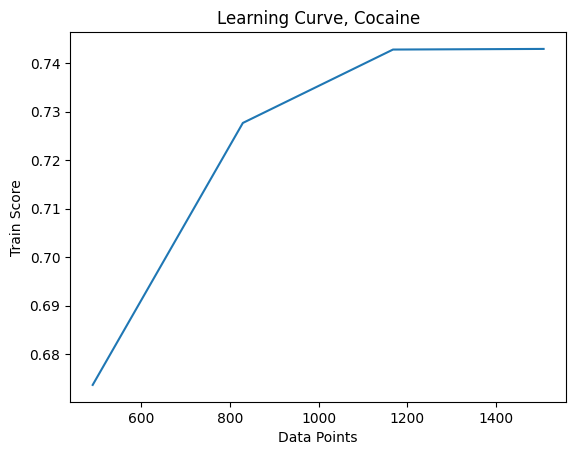

In [1374]:
clf = SVC(kernel='rbf', C=.01, gamma=.1, probability=True)

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, scoring='roc_auc')

plt.plot(train_sizes, test_scores.mean(axis=1))
plt.xlabel("Data Points")
plt.ylabel("Train Score")
plt.title("Learning Curve, Cocaine")

plt.savefig("svc_test_curve_coke.png")

In [1391]:
clf_1 = SVC(kernel='rbf', C=.01, gamma=.1, probability=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

clf_1.fit(X_train[:1200], y_train[:1200])

first_pred = clf_1.predict(X_test)

clf_2 = SVC(kernel='rbf', C=.01, gamma=.1, probability=True)
clf_2.fit(X_train, y_train)
second_pred = clf_2.predict(X_test)

comparison = np.equal(first_pred, second_pred)
len(first_pred)

377

In [795]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

X_train, X_test, y_train, y_test = train_test_split(X_reduced.to_numpy(), y.to_numpy(), test_size=.33, random_state=0)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [1406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
clf = SVC(C = 100, gamma=.0001, kernel='rbf', probability=True)
clf.fit(X_train, y_train)

roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

0.7188751406074241

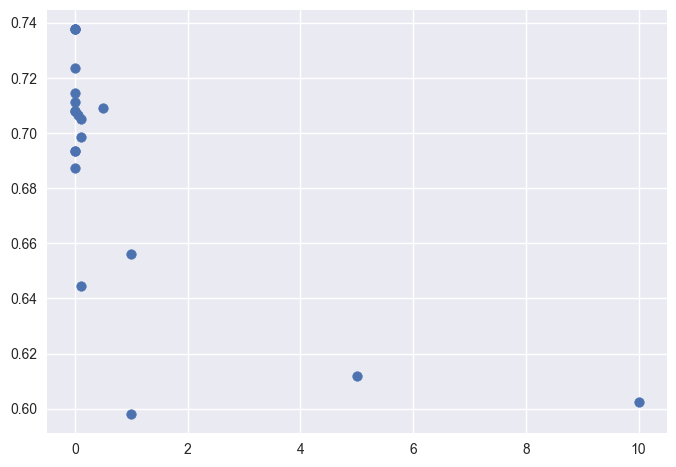

In [642]:
plt.scatter(C_times_gamma, roc_auc_scores)

In [1449]:
param_grid = {'C': [.01, .1, 1, 10, 100], 
              #'degree': [2, 3, 4],
              'gamma': [1, .5, .1, .01, .001],
              'kernel': ['anova']
             }



In [1452]:
X = df[['Age', 'Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_Australia', 'Country_Canada',
      'Country_Ireland', 'Country_New Zealand', 'Country_Other', 'Country_UK',
        'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Black/Asian', 'Ethnicity_Other', 
        'Ethnicity_White', 'Ethnicity_White/Asian', 'Ethnicity_White/Black']]

y = df['Coke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0)

content = ""

for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        start = time.time()
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        end = time.time()
        runtime = end - start
        score = accuracy_score(y_valid, clf.predict(X_valid))
        content += f"C: {C}, Gamma: {gamma}, Score: {score}, Runtime: {runtime}\n"

with open("svm_runtime_info.txt", "w") as f:
    f.write(content)

In [757]:
X_reduced = df[['Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_UK',
       'Country_USA']]

y = df['Heroin']

'''SVM does a good job of removing irrelevant features, experiences only a 20 percent slowdown'''

'SVM does a good job of removing irrelevant features, experiences only a 20 percent slowdown'

In [745]:
X = df[['Age', 'Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_Australia', 'Country_Canada',
       'Country_Ireland', 'Country_New Zealand', 'Country_Other', 'Country_UK',
       'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Black/Asian', 'Ethnicity_Other', 
        'Ethnicity_White', 'Ethnicity_White/Asian', 'Ethnicity_White/Black']]

y = df['Heroin']

param_grid = {'C': [.01, .02, .03, .04, .05], 
              'kernel': ['sigmoid']
             }



#run_svm_experiment(param_grid, X_reduced, y, 'sigmoid_tuning_reduced.txt', upsample=True)

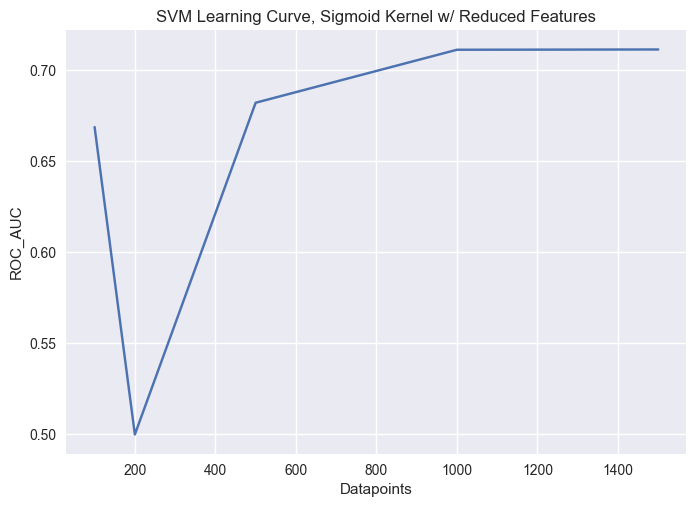

In [749]:
#hyperparameters for SVM: Gamma, kernel function, C
#generate and save learning curve

from sklearn.utils import shuffle

train_sizes = [100, 200, 500, 1000, 1500]

X_train, X_test, y_train, y_test = train_test_split(X_reduced.to_numpy(), y.to_numpy(), test_size=.33, random_state=0)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

X_train_res, y_train_res = shuffle(X_train_res, y_train_res, random_state=0)

scores = []

for size in train_sizes:
    svm = SVC(kernel='sigmoid', C=.01)
    partial_X_train = X_train_res[:size]
    partial_y_train = y_train_res[:size]
    svm.fit(partial_X_train, partial_y_train)
    score = roc_auc_score(y_test, svm.predict(X_test))
    scores.append(score)

plt.plot(train_sizes, scores)
plt.title("SVM Learning Curve, Sigmoid Kernel w/ Reduced Features")
plt.xlabel("Datapoints")
plt.ylabel("ROC_AUC")
plt.savefig("sigmoid_reduced_curve.png")

### K Nearest Neighbors

In [1611]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#define classification problems: semeron consumption, heroin consumption

X = df[['Age', 'Gender', 'NScore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_Australia', 'Country_Canada',
       'Country_Ireland', 'Country_New Zealand', 'Country_Other', 'Country_UK',
       'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Black/Asian', 'Ethnicity_Other', 
        'Ethnicity_White', 'Ethnicity_White/Asian', 'Ethnicity_White/Black']]

y = df['Coke']

X_reduced = df[['Age', 'Gender', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Country_UK', "Country_USA"]]

y = df['Mushrooms']

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0)

# scale data 

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_valid = scaler.transform(X_valid)

In [1565]:
corr_df = X_train.join(y_train)
corr_df.corr()['Mushrooms']

Age           -0.368913
Gender        -0.267415
Oscore         0.331126
Ascore        -0.118339
Cscore        -0.182461
Impulsive      0.235943
SS             0.356032
Country_UK    -0.463538
Country_USA    0.405789
Mushrooms      1.000000
Name: Mushrooms, dtype: float64

Neighbors: 1 Score: 0.6506411698537683
Neighbors: 2 Score: 0.7244319460067492
Neighbors: 3 Score: 0.7508661417322835
Neighbors: 4 Score: 0.7697637795275591
Neighbors: 5 Score: 0.7721709786276716
Neighbors: 6 Score: 0.7792125984251967
Neighbors: 7 Score: 0.7877840269966254
Neighbors: 8 Score: 0.7916535433070866
Neighbors: 9 Score: 0.7980427446569178
Neighbors: 10 Score: 0.8043194600674916
Neighbors: 11 Score: 0.7967604049493813
Neighbors: 12 Score: 0.7959280089988752
Neighbors: 13 Score: 0.8007424071991001
Neighbors: 14 Score: 0.8044094488188976
Neighbors: 15 Score: 0.8065466816647919
Neighbors: 16 Score: 0.8076265466816648
Neighbors: 17 Score: 0.8021372328458942
Neighbors: 18 Score: 0.8069516310461192
Neighbors: 19 Score: 0.807806524184477
Neighbors: 20 Score: 0.8101687289088864
Neighbors: 21 Score: 0.8101462317210348
Neighbors: 22 Score: 0.8098987626546681
Neighbors: 23 Score: 0.8119460067491563
Neighbors: 24 Score: 0.8117435320584927
Neighbors: 25 Score: 0.8141507311586051
Neighbors:

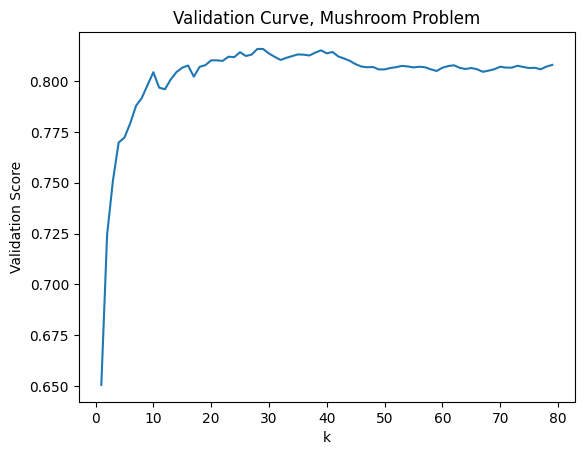

In [1618]:
best_score = 0

scores = []

for i in range(1, 80): 
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    score = roc_auc_score(y_valid, knn.predict_proba(X_valid)[:, 1])
    
    scores.append(score)

    if score > best_score:
        best_i = i
        best_score = score
    
    print(f"Neighbors: {i} Score: {score}")
    
   # with open("knn_experiments/mushroom_results.txt", "a") as f:
   #     f.write(f"Neighbors: {i} Score: {score}\n")

knn = KNeighborsClassifier(n_neighbors=best_i).fit(X_train, y_train)
test_score = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

plt.plot(list(range(1, 80)), scores)

plt.xlabel("k")
plt.ylabel("Validation Score")
plt.title("Validation Curve, Mushroom Problem")

plt.savefig("k_validation_mushroom.png")

#with open("knn_experiments/mushroom_results.txt", "a") as f:
#        f.write(f"Best i: {best_i} Test score: {test_score}\n")

#scaler didn't work

In [1556]:
dist, ind = knn.kneighbors([X_test[5]], n_neighbors=29)
print(dist)

[[1.72643654 1.83257468 1.87899055 1.90660588 2.0033754  2.2287132
  2.27064408 2.32354937 2.3353652  2.34654622 2.39288711 2.41582617
  2.43084387 2.43711213 2.44980525 2.48296977 2.48739562 2.50907856
  2.50931893 2.51488183 2.51714932 2.52283232 2.54429078 2.54745259
  2.55194515 2.55950844 2.56542897 2.57312667 2.59576072]]


In [1595]:
#best is 22
start = time.time()
knn = KNeighborsClassifier(n_neighbors=best_i).fit(X_train, y_train)
end = time.time()
runtime = end - start
print(f"Runtime: {runtime}")

start = time.time()
score = roc_auc_score(y_test, knn.predict_proba(X_test.values)[:, 1])
end = time.time()
runtime = end - start
print(score)
print(runtime)

Runtime: 0.00494074821472168
0.837078292042763
0.01240086555480957


/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [1106]:
best_i

39

/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 459, in _score
    y_pred = method_caller(clf, "decision_function", X, pos_label=pos_label)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Caskroom/miniconda/base/envs/holford/lib/python3.11/site-packages/sklearn/utils/_response.py", line 73, in _get_response_values
    prediction_method = _check_response_method(estimator, respo

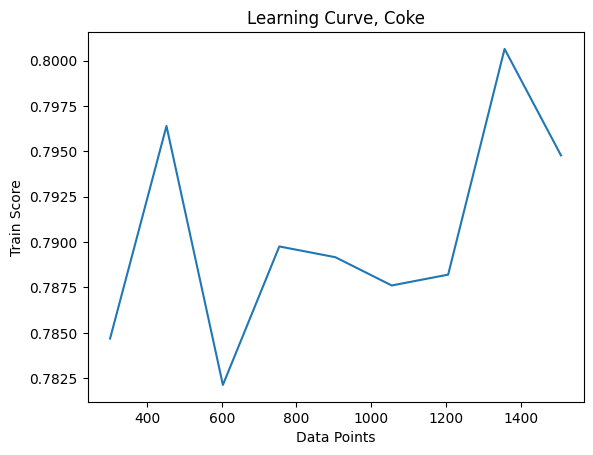

In [1574]:
clf =  KNeighborsClassifier(n_neighbors=20)

train_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
train_sizes, train_scores, test_scores = learning_curve(clf, X_reduced.values, y.values, train_sizes=train_sizes, scoring='roc_auc')
plt.plot(train_sizes, test_scores.mean(axis=1))
plt.xlabel("Data Points")
plt.ylabel("Validation Score")
plt.title("Learning Curve, Coke")

plt.savefig("KNN_learn_curve_coke.png")

plt.clf()

plt.plot(train_sizes, train_scores.mean(axis=1))
plt.xlabel("Data Points")
plt.ylabel("Train Score")
plt.title("Learning Curve, Coke")

plt.savefig("KNN_train_curve_coke.png")


In [1123]:
#results
# Decision Tree: Mushrooms .801 (.0078 s), Cocaine .732 (.00593 s)
# Neural Network: Mushrooms .841 (.199 s), Cocaine .777 (.218 s)
# Boosting: Mushrooms .843 (.157 s), Cocaine .782 (.0650 s)
# SVM: Mushrooms .845 (.168 s), Cocaine .764 (.213 s)
# KNN: Mushrooms .831 (.0043 s), Cocaine .770 (.00367 s)